Calling All Autobots

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
import os

Function for histogram matching

In [33]:
# Function for histogram matching
def histogram_matching(source, template):
    matched = exposure.match_histograms(source, template, channel_axis=None)
    return matched

def plot_histogram(image, ax, title):
    ax.hist(image.ravel(), bins=256, histtype='step', color='black')
    ax.set_title(title)
    ax.set_xlim(0, 256)

def plot_cdf(image, ax, title):
    cdf, bins = exposure.cumulative_distribution(image, nbins=256)
    ax.plot(bins, cdf, 'r')
    ax.set_title(title)
    ax.set_xlim(0, 256)

def histogram_matching_curve_mapping(source, template):
    matched = exposure.match_histograms(source, template, channel_axis=None)
    
    # Compute histograms and CDFs
    source_hist, source_bins = np.histogram(source.ravel(), bins=256, range=[0, 256], density=True)
    template_hist, template_bins = np.histogram(template.ravel(), bins=256, range=[0, 256], density=True)
    
    source_cdf = np.cumsum(source_hist)
    template_cdf = np.cumsum(template_hist)
    
    # Create interpolation functions
    source_values = np.linspace(0, 255, 256)
    source_interp = np.interp(source_values, source_bins[:-1], source_cdf)
    template_interp = np.interp(source_values, template_bins[:-1], template_cdf)
    
    # Compute mapping
    mapping = np.interp(source_interp, template_interp, source_values)
    
    return matched, mapping

Dataset

In [34]:
#Data training
image1 = 'Images/training/drishtiGS_017.png'
image2 = 'Images/training/drishtiGS_032.png'
image3 = 'Images/training/drishtiGS_036.png'
image4 = 'Images/training/drishtiGS_037.png'
image5 ='Images/training/drishtiGS_040.png'
image6 = 'Images/training/drishtiGS_042.png'
image7 = 'Images/training/drishtiGS_049.png'
image8 = 'Images/training/drishtiGS_057.png'
image9 = 'Images/training/drishtiGS_060.png'
image10 = 'Images/training/drishtiGS_063.png'
image11 = 'Images/training/drishtiGS_064.png'
image12 = 'Images/training/drishtiGS_066.png'
image13 = 'Images/training/drishtiGS_068.png'
image14 = 'Images/training/drishtiGS_069.png'
image15 = 'Images/training/drishtiGS_080.png'
image16 = 'Images/training/drishtiGS_081.png'
image17 = 'Images/training/drishtiGS_084.png'
image18 = 'Images/training/drishtiGS_088.png'
image19 = 'Images/training/drishtiGS_094.png'
image20 = 'Images/training/drishtiGS_098.png'

#Data Testing
image21 = 'Images/testing/drishtiGS_033.png'
image22 = 'Images/testing/drishtiGS_038.png'
image23 = 'Images/testing/drishtiGS_041.png'
image24 = 'Images/testing/drishtiGS_046.png'
image25 = 'Images/testing/drishtiGS_051.png'
image26 = 'Images/testing/drishtiGS_058.png'
image27 = 'Images/testing/drishtiGS_076.png'
image28 = 'Images/testing/drishtiGS_089.png'
image29 = 'Images/testing/drishtiGS_090.png'
image30 = 'Images/testing/drishtiGS_092.png'


# Buat list yang berisi semua variabel gambar
images = [
    image1, image2, image3, image4, image5,
    image6, image7, image8, image9, image10,
    image11, image12, image13, image14, image15,
    image16, image17, image18, image19, image20,
    image21, image22, image23, image24, image25,
    image26, image27, image28, image29, image30
]

Show Raw Fundus

In [35]:
# for image_path in images:
#     # Read the image from the file path
#     image = cv2.imread(image_path)
    
#     # Check if the image was successfully loaded
#     if image is not None:
#         # Convert the image color from BGR to RGB
#         image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
#         # Display the image
#         plt.imshow(image_rgb)
#         plt.title('Data Image RGB '+image_path)
#         plt.tight_layout()
#         plt.show()
#     else:
#         print(f"Failed to load image at path: {image_path}")

OD Biner Actual

In [36]:
#Data training
actual1 = 'Images/OD_training/drishtiGS_017_ODAvgBoundary_OD_img.png'
actual2 = 'Images/OD_training/drishtiGS_032_ODAvgBoundary_OD_img.png'
actual3 = 'Images/OD_training/drishtiGS_036_ODAvgBoundary_OD_img.png'
actual4 = 'Images/OD_training/drishtiGS_037_ODAvgBoundary_OD_img.png'
actual5 ='Images/OD_training/drishtiGS_040_ODAvgBoundary_OD_img.png'
actual6 = 'Images/OD_training/drishtiGS_042_ODAvgBoundary_OD_img.png'
actual7 = 'Images/OD_training/drishtiGS_049_ODAvgBoundary_OD_img.png'
actual8 = 'Images/OD_training/drishtiGS_057_ODAvgBoundary_OD_img.png'
actual9 = 'Images/OD_training/drishtiGS_060_ODAvgBoundary_OD_img.png'
actual10 = 'Images/OD_training/drishtiGS_063_ODAvgBoundary_OD_img.png'
actual11 = 'Images/OD_training/drishtiGS_064_ODAvgBoundary_OD_img.png'
actual12 = 'Images/OD_training/drishtiGS_066_ODAvgBoundary_OD_img.png'
actual13 = 'Images/OD_training/drishtiGS_068_ODAvgBoundary_OD_img.png'
actual14 = 'Images/OD_training/drishtiGS_069_ODAvgBoundary_OD_img.png'
actual15 = 'Images/OD_training/drishtiGS_080_ODAvgBoundary_OD_img.png'
actual16 = 'Images/OD_training/drishtiGS_081_ODAvgBoundary_OD_img.png'
actual17 = 'Images/OD_training/drishtiGS_084_ODAvgBoundary_OD_img.png'
actual18 = 'Images/OD_training/drishtiGS_088_ODAvgBoundary_OD_img.png'
actual19 = 'Images/OD_training/drishtiGS_094_ODAvgBoundary_OD_img.png'
actual20 = 'Images/OD_training/drishtiGS_098_ODAvgBoundary_OD_img.png'

#Data Testing
actual21 = 'Images/OD_testing/drishtiGS_033_ODAvgBoundary_OD_img.png'
actual22 = 'Images/OD_testing/drishtiGS_038_ODAvgBoundary_OD_img.png'
actual23 = 'Images/OD_testing/drishtiGS_041_ODAvgBoundary_OD_img.png'
actual24 = 'Images/OD_testing/drishtiGS_046_ODAvgBoundary_OD_img.png'
actual25 = 'Images/OD_testing/drishtiGS_051_ODAvgBoundary_OD_img.png'
actual26 = 'Images/OD_testing/drishtiGS_058_ODAvgBoundary_OD_img.png'
actual27 = 'Images/OD_testing/drishtiGS_076_ODAvgBoundary_OD_img.png'
actual28 = 'Images/OD_testing/drishtiGS_089_ODAvgBoundary_OD_img.png'
actual29 = 'Images/OD_testing/drishtiGS_090_ODAvgBoundary_OD_img.png'
actual30 = 'Images/OD_testing/drishtiGS_092_ODAvgBoundary_OD_img.png'

# Buat list yang berisi semua variabel gambar
actuals = [
    actual1, actual2, actual3, actual4, actual5,
    actual6, actual7, actual8, actual9, actual10,
    actual11, actual12, actual13, actual14, actual15,
    actual16, actual17, actual18, actual19, actual20,
    actual21, actual22, actual23, actual24, actual25,
    actual26, actual27, actual28, actual29, actual30
]

Show Actual OD

In [37]:
# for actual_path in actuals:
#     # Read the image from the file path
#     actual = cv2.imread(actual_path)
    
#     # Check if the image was successfully loaded
#     if actual is not None:
#         # Convert the image color from BGR to RGB
#         actual_rgb = cv2.cvtColor(actual, cv2.COLOR_BGR2RGB)
        
#         # Display the image
#         plt.imshow(actual_rgb)
#         plt.title('Actual OD '+actual_path)
#         plt.tight_layout()
#         plt.show()
#     else:
#         print(f"Failed to load image at path: {actual_path}")

OC Actual

In [38]:
oc1 = 'Images/OC_training/drishtiGS_017_CupAvgBoundary_OC_img.png'
oc2 = 'Images/OC_training/drishtiGS_032_CupAvgBoundary_OC_img.png'
oc3 = 'Images/OC_training/drishtiGS_036_CupAvgBoundary_OC_img.png'
oc4 = 'Images/OC_training/drishtiGS_037_CupAvgBoundary_OC_img.png'
oc5 = 'Images/OC_training/drishtiGS_040_CupAvgBoundary_OC_img.png'
oc6 = 'Images/OC_training/drishtiGS_042_CupAvgBoundary_OC_img.png'
oc7 = 'Images/OC_training/drishtiGS_049_CupAvgBoundary_OC_img.png'
oc8 = 'Images/OC_training/drishtiGS_057_CupAvgBoundary_OC_img.png'
oc9 = 'Images/OC_training/drishtiGS_060_CupAvgBoundary_OC_img.png'
oc10 = 'Images/OC_training/drishtiGS_063_CupAvgBoundary_OC_img.png'
oc11 = 'Images/OC_training/drishtiGS_064_CupAvgBoundary_OC_img.png'
oc12 = 'Images/OC_training/drishtiGS_066_CupAvgBoundary_OC_img.png'
oc13 = 'Images/OC_training/drishtiGS_068_CupAvgBoundary_OC_img.png'
oc14 = 'Images/OC_training/drishtiGS_069_CupAvgBoundary_OC_img.png'
oc15 = 'Images/OC_training/drishtiGS_080_CupAvgBoundary_OC_img.png'
oc16 = 'Images/OC_training/drishtiGS_080_CupAvgBoundary_OC_img.png'
oc17 = 'Images/OC_training/drishtiGS_081_CupAvgBoundary_OC_img.png'
oc18 = 'Images/OC_training/drishtiGS_084_CupAvgBoundary_OC_img.png'
oc19 = 'Images/OC_training/drishtiGS_094_CupAvgBoundary_OC_img.png'
oc20 = 'Images/OC_training/drishtiGS_098_CupAvgBoundary_OC_img.png'

oc21 = 'Images/OC_testing/drishtiGS_033_CupAvgBoundary_OC_img.png'
oc22 = 'Images/OC_testing/drishtiGS_038_CupAvgBoundary_OC_img.png'
oc23 = 'Images/OC_testing/drishtiGS_041_CupAvgBoundary_OC_img.png'
oc24 = 'Images/OC_testing/drishtiGS_046_CupAvgBoundary_OC_img.png'
oc25 = 'Images/OC_testing/drishtiGS_051_CupAvgBoundary_OC_img.png'
oc26 = 'Images/OC_testing/drishtiGS_058_CupAvgBoundary_OC_img.png'
oc27 = 'Images/OC_testing/drishtiGS_076_CupAvgBoundary_OC_img.png'
oc28 = 'Images/OC_testing/drishtiGS_089_CupAvgBoundary_OC_img.png'
oc29 = 'Images/OC_testing/drishtiGS_090_CupAvgBoundary_OC_img.png'
oc30 = 'Images/OC_testing/drishtiGS_092_CupAvgBoundary_OC_img.png'

Read reference image

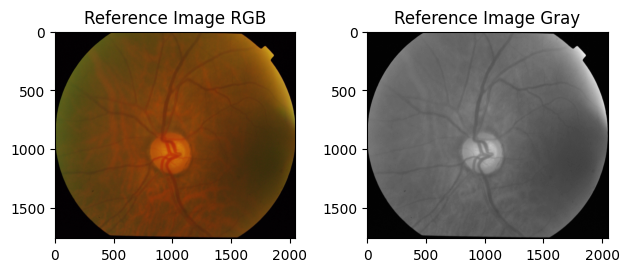

In [39]:
# Read reference image and input image
reference_image_path = 'Images/training/drishtiGS_037.png'
# Load the images
reference_image = cv2.imread(reference_image_path)
# Convert images to grayscale
gray_reference = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB))
plt.title('Reference Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(gray_reference, cmap='gray')
plt.title('Reference Image Gray')

# Show the plots
plt.tight_layout()
plt.show()

Load Images

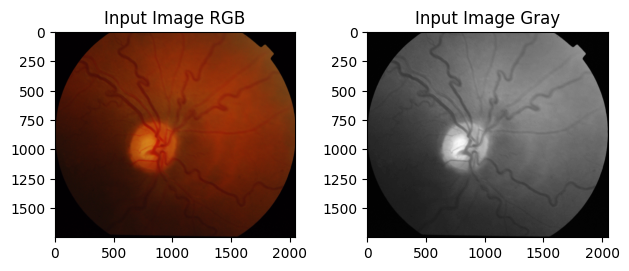

In [40]:
# Load the images
input_img = image20 #Ubah sesuai gambar
actual_img = actual20 #Ubah sesuai gambar
oc = oc20 #Ubah sesuai gambar

actual_oc = cv2.imread(oc)
actual_oc_gray = cv2.cvtColor(actual_oc, cv2.COLOR_BGR2GRAY)

fundus_image = cv2.imread(input_img)
# Convert images to grayscale
gray_image = cv2.cvtColor(fundus_image, cv2.COLOR_BGR2GRAY)

fundus_image_copy = fundus_image.copy()

# For Actual
actual_od = cv2.imread(actual_img)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(fundus_image, cv2.COLOR_BGR2RGB))
plt.title('Input Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Input Image Gray')

# Show the plots
plt.tight_layout()
plt.show()

Histogram Matching

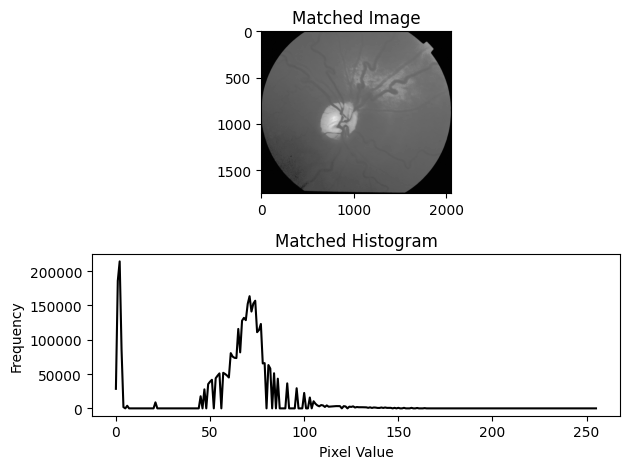

In [41]:
# Perform histogram matching
matched_image = histogram_matching(gray_image, gray_reference)

# Ensure matched_image is uint8 type
matched_image = matched_image.astype(np.uint8)
hist_matched = cv2.calcHist([matched_image], [0], None, [256], [0, 256])


plt.subplot(2, 1, 1)
plt.imshow(matched_image, cmap='gray')
plt.title('Matched Image')

plt.subplot(2, 1, 2)
plt.plot(hist_matched, color='black')
plt.title('Matched Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
# Show the plots
plt.tight_layout()
plt.show()

Curve Mapping Matching

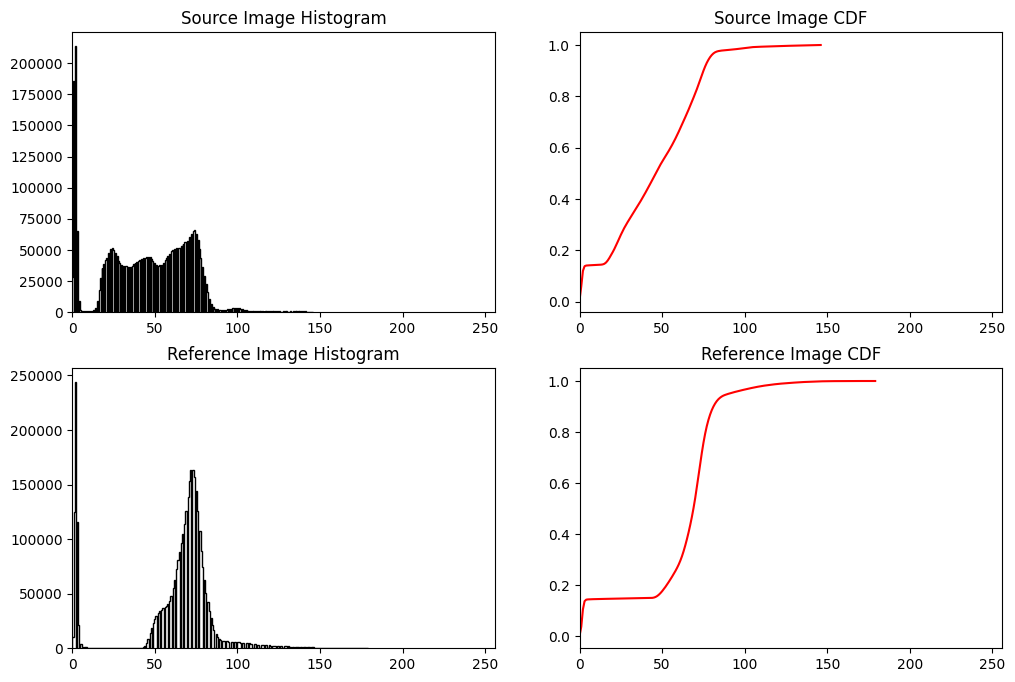

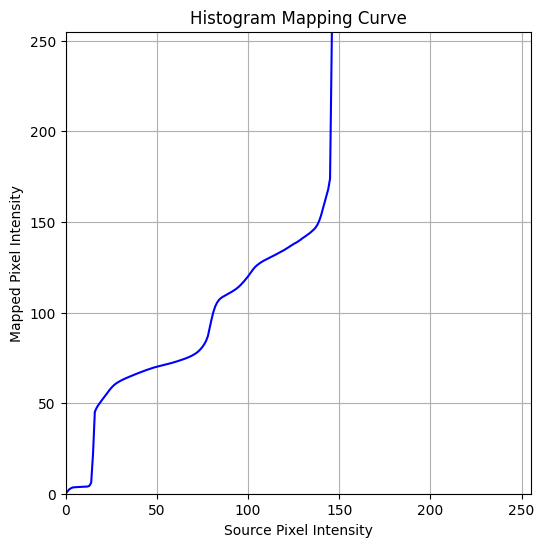

In [42]:
# Perform histogram matching and get the mapping curve
matched_image, mapping = histogram_matching_curve_mapping(gray_image, gray_reference)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

plot_histogram(gray_image, axes[0, 0], 'Source Image Histogram')
plot_cdf(gray_image, axes[0, 1], 'Source Image CDF')

plot_histogram(gray_reference, axes[1, 0], 'Reference Image Histogram')
plot_cdf(gray_reference, axes[1, 1], 'Reference Image CDF')

# Plot mapping curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(mapping, color='blue')
ax.set_title('Histogram Mapping Curve')
ax.set_xlabel('Source Pixel Intensity')
ax.set_ylabel('Mapped Pixel Intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.grid(True)

plt.show()

1st Cropping

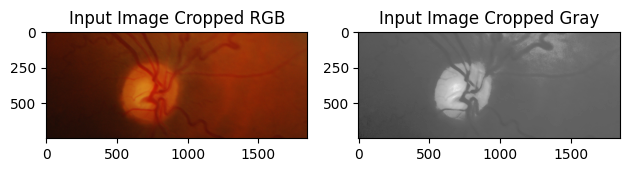

In [43]:
# Get the dimensions of the image
height, width, _ = fundus_image.shape

# Crop the image along the y-axis from 700 to 1400
# Taking the entire width for x-axis
xa=100
xb=100
ya=550
yb=1300

fundus_cropped = matched_image[ya:yb, xa:width-xb]
RGB_cropped = fundus_image[ya:yb, xa:width-xb]

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(RGB_cropped.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Input Image Cropped RGB')

plt.subplot(1, 2, 2)
plt.imshow(fundus_cropped, cmap='gray')
plt.title('Input Image Cropped Gray')

# Show the plots
plt.tight_layout()
plt.show()

Thresholding

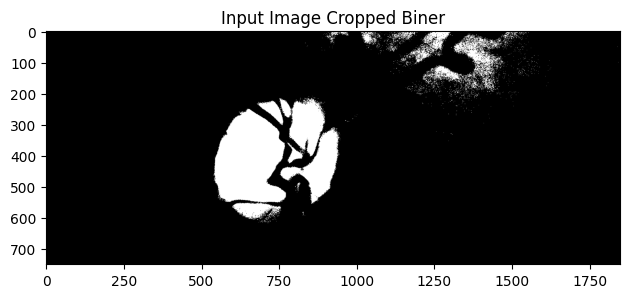

In [44]:
# Apply thresholding
_, binary_image = cv2.threshold(fundus_cropped, 100, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.title('Input Image Cropped Biner')

# Show the plots
plt.tight_layout()
plt.show()

Opening Closing

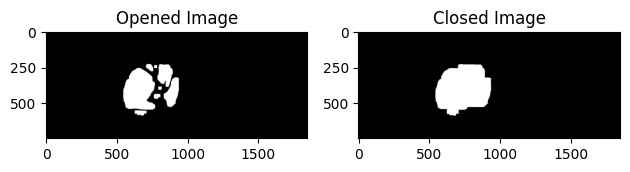

In [45]:
# Perform morphological closing
kernel_open = np.ones((20, 20), np.uint8)
opened_image=cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_open)
kernel_close = np.ones((100,100),np.uint8)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel_close)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')

plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

# Show the plots
plt.tight_layout()
plt.show()

Convert closed_image to grayscale

In [46]:
# Convert closed_image to grayscale if it's not already in grayscale
if len(closed_image.shape) > 2:
    closed_image_gray = cv2.cvtColor(closed_image, cv2.COLOR_BGR2GRAY)
else:
    closed_image_gray = closed_image

# Ensure the image is in the correct format (CV_8UC1)
closed_image_uint8 = np.uint8(closed_image_gray)

Contours

In [47]:
# Find contours
contours, _ = cv2.findContours(closed_image_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if any contours were found
if not contours:
    raise ValueError("No contours found in the image")

# Get the largest contour
largest_contour_ROI = max(contours, key=cv2.contourArea)

Inisiasi x1,x2,y1,y2 agar menjadi global variabel

In [48]:
#Inisiasi x1,x2,y1,y2 agar menjadi global variabel
x1=0
x2=0
y1=0
y2=0

Fit ellipse ke kontur terbesar

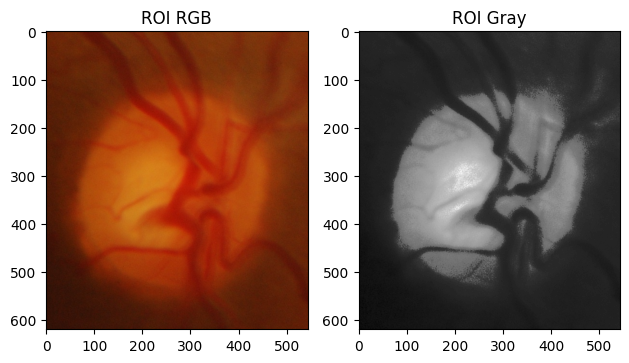

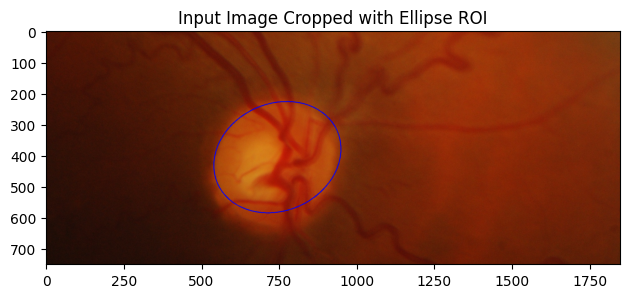

In [49]:
# Fit ellipse ke kontur terbesar
if len(largest_contour_ROI) >= 5:  # Minimum number of points required to fit ellipse
    ellipse_ROI = cv2.fitEllipse(largest_contour_ROI)
    
    # Get the parameters of the ellipse
    (center, axes, angle) = ellipse_ROI
    center_x, center_y = center
    width, height = axes

    # Calculate bounding box of the ellipse
    x1 = int(center_x - width // 2)-100
    x2 = int(center_x + width // 2)+100
    y1 = int(center_y - height // 2)-100
    y2 = int(center_y + height // 2)+100

    # Ensure the crop area is within the image bounds
    y1, y2 = max(0, y1), min(fundus_cropped.shape[0], y2)
    x1, x2 = max(0, x1), min(fundus_cropped.shape[1], x2)

    # Crop the image to the bounding box of the ellipse
    roi_gray = fundus_cropped[y1:y2, x1:x2]
    roi_rgb = RGB_cropped[y1:y2, x1:x2]
    roi_rgb_copy = roi_rgb.copy()

    # Convert RGB_cropped to RGB format
    color_image = cv2.cvtColor(RGB_cropped, cv2.COLOR_BGR2RGB)

    # Draw ellipse on the color image
    cv2.ellipse(color_image, ellipse_ROI, (0, 0, 255), 2)
    
    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(roi_rgb, cv2.COLOR_BGR2RGB))
    plt.title('ROI RGB')

    plt.subplot(1, 2, 2)
    plt.imshow(roi_gray, cmap='gray')
    plt.title('ROI Gray')

    # Show the plots
    plt.tight_layout()
    plt.show()
    
    plt.imshow(color_image, cmap='gray')
    plt.title('Input Image Cropped with Ellipse ROI')

    # Show the plots
    plt.tight_layout()
    plt.show()

else:
    print("Kontur tidak cukup poin untuk fitting ellips.")

Split RGB Channel

In [50]:
B, G, R = cv2.split(roi_rgb)

Function to display images using matplotlib

In [51]:
def show_image(title, img):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

RGB Extraction

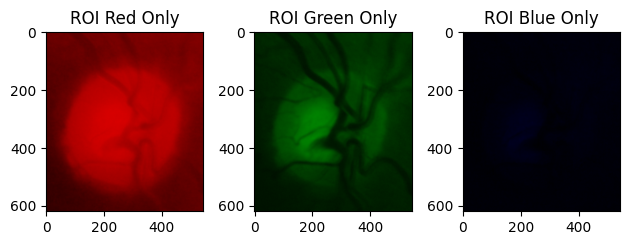

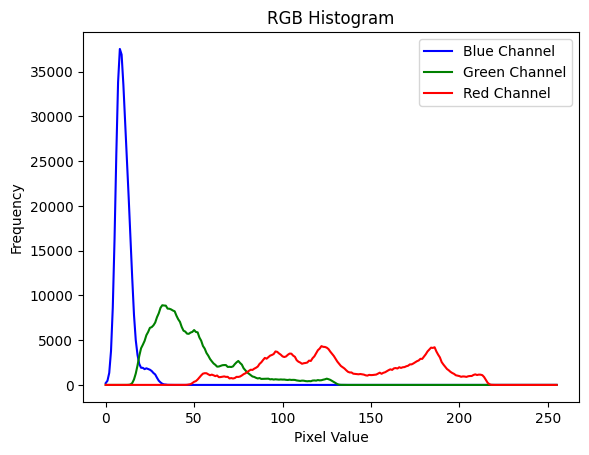

In [52]:
# Convert B, G, R from OpenCV format (BGR) to matplotlib displayable format (RGB)
# For that, we need to set R, G, B to their respective channels in the RGB image.
zeros = np.zeros_like(B)
R_img = cv2.merge([zeros, zeros, R])  # Red Only
G_img = cv2.merge([zeros, G, zeros])  # Green Only
B_img = cv2.merge([B, zeros, zeros])  # Blue Only

# Calculate the histogram for each channel (B, G, R)
hist_b = cv2.calcHist([roi_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([roi_rgb], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([roi_rgb], [2], None, [256], [0, 256])

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(R_img, cv2.COLOR_BGR2RGB))
plt.title('ROI Red Only')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(G_img, cv2.COLOR_BGR2RGB))
plt.title('ROI Green Only')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(B_img, cv2.COLOR_BGR2RGB))
plt.title('ROI Blue Only')

# Show the plots
plt.tight_layout()
plt.show()

plt.plot(hist_b, color='blue', label='Blue Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_r, color='red', label='Red Channel')
plt.title('RGB Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

Stretching Red Channel

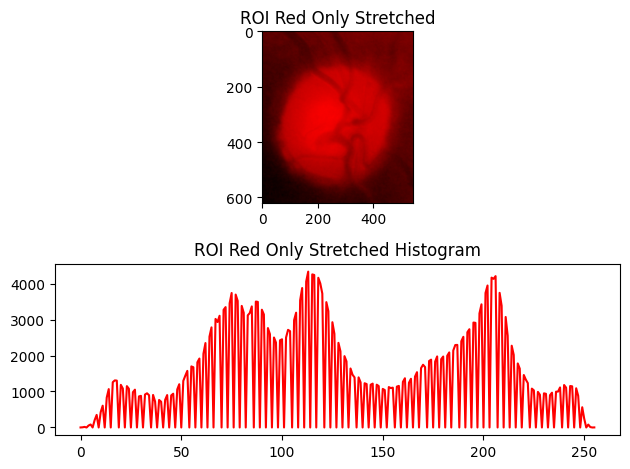

In [53]:
# Hitung nilai minimum dan maksimum dari setiap saluran warna
min_r, max_r = np.min(R), np.max(R)

# Lakukan kontras stretching pada saluran merah
r_stretched = ((R - min_r) / (max_r - min_r)) * 255
r_stretched = np.uint8(r_stretched)

# Gabungkan kembali saluran warna merah yang telah dimodifikasi dengan saluran hijau dan biru yang kosong
stretched_img = cv2.merge((zeros, zeros, r_stretched))

# Stretched hist
hist_stretch = cv2.calcHist([r_stretched], [0], None, [256], [0, 256])
    
# Pisahkan citra menjadi tiga kanal: B, G, R
b, g, r = cv2.split(stretched_img)

plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(stretched_img, cv2.COLOR_BGR2RGB))
plt.title('ROI Red Only Stretched')

plt.subplot(2, 1, 2)
plt.plot(hist_stretch, color='red')
plt.title('ROI Red Only Stretched Histogram')

# Show the plots
plt.tight_layout()
plt.show()

Thresholding Red Component

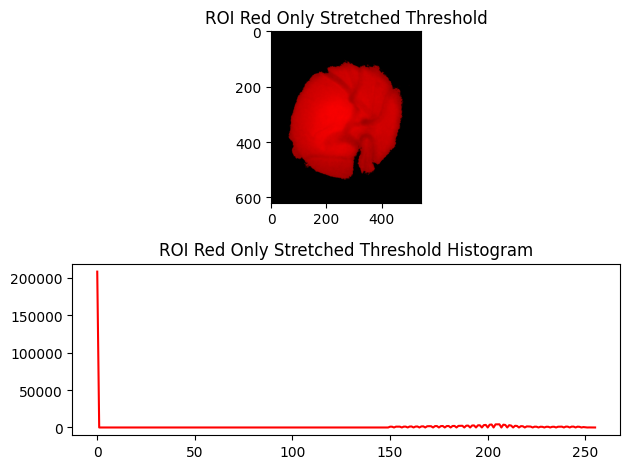

In [54]:
# Buat mask berdasarkan kondisi threshold pada kanal merah
mask = r < 150

# Set nilai pada mask menjadi 0 pada kanal merah
r[mask] = 0

# Gabungkan kembali kanal B, G, R menjadi citra RGB
pass_if_img = cv2.merge([b, g, r])
pass_if_img_hist = cv2.calcHist([pass_if_img], [2], None, [256], [0, 256])

plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(pass_if_img, cv2.COLOR_BGR2RGB))
plt.title('ROI Red Only Stretched Threshold')

plt.subplot(2, 1, 2)
plt.plot(pass_if_img_hist, color='red')
plt.title('ROI Red Only Stretched Threshold Histogram')

# Show the plots
plt.tight_layout()
plt.show()

Closing

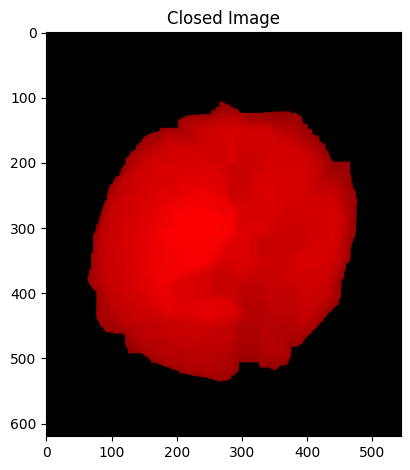

In [55]:
# Perform morphological closing
kernel_close = np.ones((30,30),np.uint8)
closed_image = cv2.morphologyEx(pass_if_img, cv2.MORPH_CLOSE, kernel_close)

plt.imshow(cv2.cvtColor(closed_image, cv2.COLOR_BGR2RGB))
plt.title('Closed Image')

# Show the plots
plt.tight_layout()
plt.show()

Contour for Ellipse Fitting

In [56]:
# Convert closed_image to grayscale if it's not already in grayscale
if len(closed_image.shape) > 2:
    closed_image_gray = cv2.cvtColor(closed_image, cv2.COLOR_BGR2GRAY)
else:
    closed_image_gray = closed_image

# Ensure the image is in the correct format (CV_8UC1)
closed_image_uint8 = np.uint8(closed_image_gray)
# Find contours
contours, _ = cv2.findContours(closed_image_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if any contours were found
if not contours:
    raise ValueError("No contours found in the image")

# Get the largest contour
largest_contour_OD = max(contours, key=cv2.contourArea)

Ellipse Fitting Image to Original Image

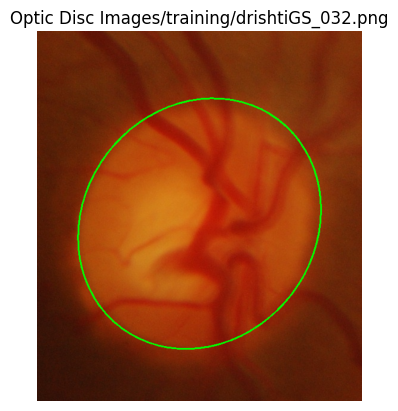

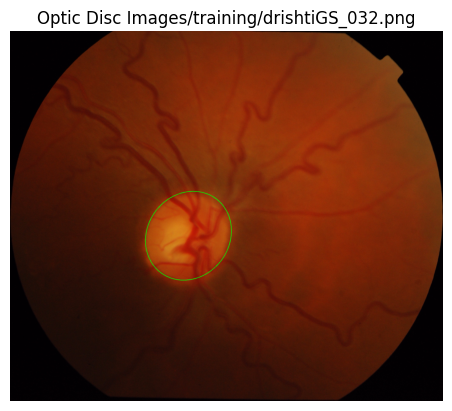

In [57]:
# Fit ellipse ke kontur terbesar
if len(largest_contour_OD) >= 20:  # Minimum number of points required to fit ellipse
    ellipse_OD = cv2.fitEllipse(largest_contour_OD)
    # Ekstrak informasi pusat dan parameter ellips lainnya
    (x_center, y_center), (major_axis, minor_axis), angle = ellipse_OD

    # Hitung pusat baru dengan penambahan nilai translasi
    new_x_center = x_center + x1 + xa
    new_y_center = y_center + y1 + ya

    # Bentuk ellips baru dengan pusat yang telah digeser
    shifted_ellipse = ((new_x_center, new_y_center), (major_axis, minor_axis), angle)
    
    # Gambar ellips ke ROI
    roi_with_ellipse = cv2.ellipse(roi_rgb, ellipse_OD, (0, 255, 0), 2)
    roi_filled = cv2.ellipse(roi_rgb_copy, ellipse_OD, (255, 255, 255), -1)

    # Gambar ellips yang diperkirakan di atas citra RGB
    optic_disc_with_ellipse = cv2.ellipse(fundus_image, shifted_ellipse, (0, 255, 0), 1)
  
    # Tampilkan citra dengan ellips dan bounding box di ROI
    plt.imshow(cv2.cvtColor(roi_with_ellipse, cv2.COLOR_BGR2RGB))
    plt.title("Optic Disc "+image2)  # Ganti sesuai sumber gambar
    plt.axis('off')
    plt.show()

    # Tampilkan citra dengan ellips dan bounding box yang diperkirakan
    plt.imshow(cv2.cvtColor(optic_disc_with_ellipse, cv2.COLOR_BGR2RGB))
    plt.title("Optic Disc "+image2)  # Ganti sesuai sumber gambar
    plt.axis('off')
    plt.show()
    
else:
    print("Kontur tidak cukup poin untuk fitting ellips.")

Bounding Box

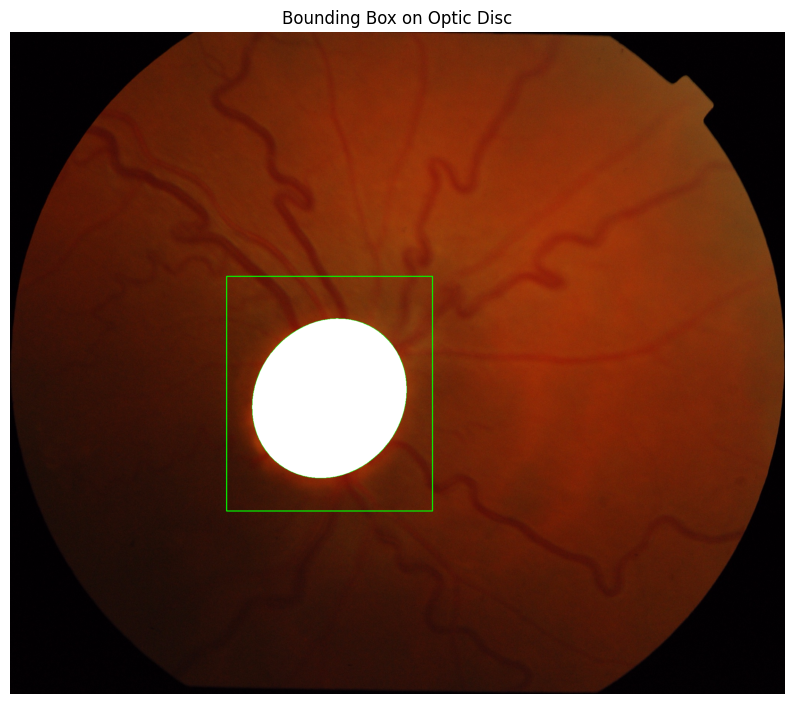

In [58]:
optic_disc_filled = cv2.ellipse(fundus_image, shifted_ellipse, (255, 255, 255), -1)
optic_disc_filled_gray =cv2.cvtColor(optic_disc_filled, cv2.COLOR_BGR2GRAY)
_, optic_disc_filled_binary = cv2.threshold(optic_disc_filled_gray, 254, 255, cv2.THRESH_BINARY)


roi_filled_gray =cv2.cvtColor(roi_filled, cv2.COLOR_BGR2GRAY)
_, roi_filled_binary = cv2.threshold(roi_filled_gray, 254, 255, cv2.THRESH_BINARY)

cv2.rectangle(fundus_image, (x1+xa, y1+ya), (x2+xa, y2+ya), (0, 255, 0), 2)

# Menampilkan citra dengan bounding box menggunakan Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(optic_disc_filled, cv2.COLOR_BGR2RGB))
plt.title('Bounding Box on Optic Disc')
plt.axis('off')
plt.show()

%OD & ROI Efficiency

The OD Percentage obtained on the image is 100.00%
ROI Efficiency obtained on the image is 40.19%


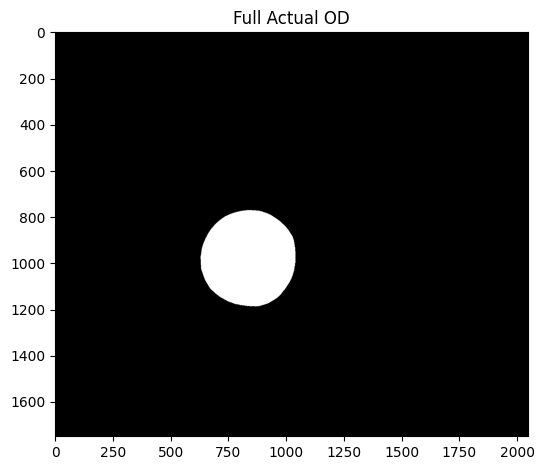

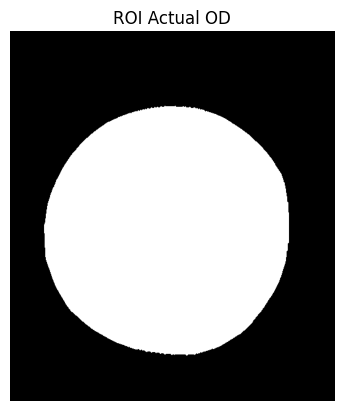

In [62]:
# Convert actual_od to a single-channel image if necessary
actual_od_gray = cv2.cvtColor(actual_od, cv2.COLOR_BGR2GRAY)

# Calculate the number of non-zero pixels full images
od_pixel = cv2.countNonZero(actual_od_gray)

# Get the dimensions of the image
height, width, _ = actual_od.shape

# Crop the image along the y-axis from 700 to 1400
# Taking the entire width for x-axis
actual_od_crop = actual_od_gray[ya:yb, xa:width-xb]

# Cropping sesuai ROI
actual_od_roi = actual_od_crop[y1:y2, x1:x2]

# Calculate the total number of pixels in the ROI
total_pixel_roi = cv2.countNonZero(actual_od_roi)

# Calculate the percentage of ROI obtained in the image
od_percent = (total_pixel_roi/od_pixel) * 100

# Get the shape of actual_od_roi
height_roi, width_roi = actual_od_roi.shape

roi_eff = total_pixel_roi*100 / (height_roi * width_roi)

print("The OD Percentage obtained on the image is {:.2f}%".format(od_percent))
print("ROI Efficiency obtained on the image is {:.2f}%".format(roi_eff))

# Print the percentage
plt.imshow(actual_od_gray, cmap='gray')
plt.title('Full Actual OD')
# Show the plots
plt.tight_layout()
plt.show()

plt.imshow(actual_od_roi, cmap='gray')
plt.title("ROI Actual OD")
plt.axis('off')
plt.show()


Calculate F-Score

False Negative: 7909
False Positive: 6039
True Positive: 127645
F-Score OD = 90.15%


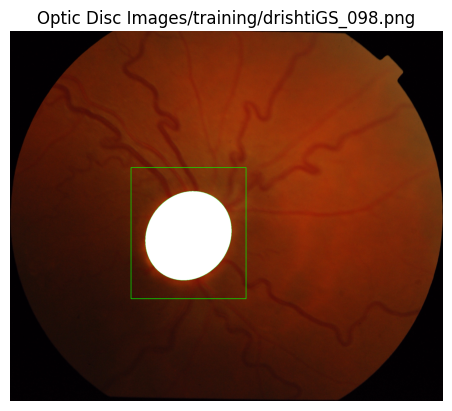

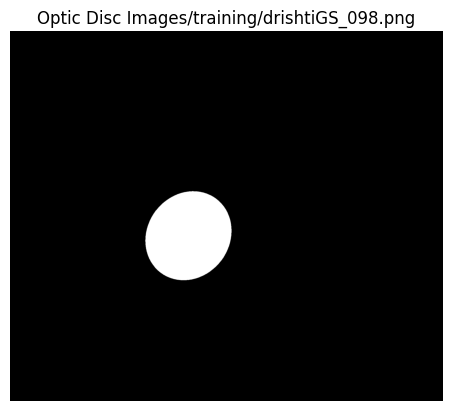

In [60]:
# Menginisialisasi hitung untuk false negative, false positive, dan true positive
false_negative = 0
false_positive = 0
true_positive = 0

# Looping untuk setiap piksel di kedua citra
for y in range(height):
    for x in range(width):
        # false negative
        if optic_disc_filled_binary[y, x] == 0 and actual_od_gray[y, x] == 255:
            false_negative += 1
        # false positive
        elif optic_disc_filled_binary[y, x] == 255 and actual_od_gray[y, x] == 0:
            false_positive += 1
        # true positive
        elif optic_disc_filled_binary[y, x] == 255 and actual_od_gray[y, x] == 255:
            true_positive += 1

# Menampilkan hasil
print("False Negative:", false_negative)
print("False Positive:", false_positive)
print("True Positive:", true_positive)
f_score_od = true_positive*100/(true_positive+false_positive+false_negative)
print("F-Score OD = {:.2f}%".format(f_score_od))

plt.imshow(cv2.cvtColor(optic_disc_filled, cv2.COLOR_BGR2RGB))
plt.title("Optic Disc "+input_img) 
plt.axis('off')
plt.show()

plt.imshow(optic_disc_filled_binary, cmap='gray')
plt.title("Optic Disc "+input_img) 
plt.axis('off')
plt.show()

Only OD

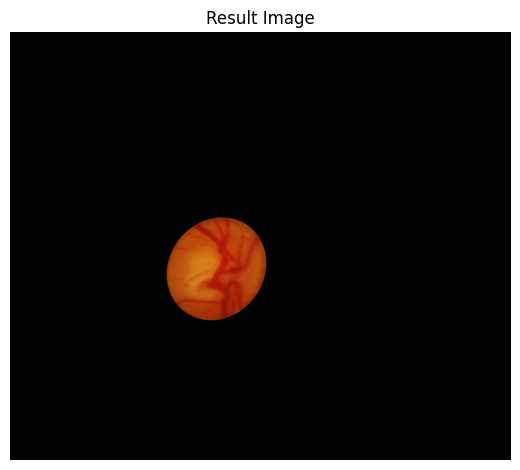

In [61]:
input_img_rgb = cv2.imread(input_img)

# Now perform the multiplication
segmented_optic_disk = cv2.bitwise_and(input_img_rgb, input_img_rgb, mask=optic_disc_filled_binary)

#Show
plt.title('Result Image')
plt.imshow(cv2.cvtColor(segmented_optic_disk, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()